# Importing the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Pre-Processing

In [2]:
tracks=pd.read_csv("fma-rock-vs-hiphop.csv")
echonest_metrics = pd.read_json("echonest-metrics.json")

In [3]:
tracks.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
echonest_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
10,145,0.235506,0.438672,0.487752,0.716122,0.070359,0.047298,120.790,0.650452
100,341,0.977282,0.468808,0.134975,0.687700,0.105381,0.073124,119.646,0.430707
1000,3457,0.081256,0.897197,0.367886,0.104474,0.085845,0.041271,100.744,0.749293


In [5]:
echo_tracks = echonest_metrics.merge(tracks[['track_id', 'genre_top']], on='track_id')

In [6]:
echo_tracks.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,341,0.977282,0.468808,0.134975,0.687700,0.105381,0.073124,119.646,0.430707,Rock
3,46204,0.953349,0.498525,0.552503,0.924391,0.684914,0.028885,78.958,0.430448,Rock
4,46205,0.613229,0.500320,0.487992,0.936811,0.637750,0.030327,112.667,0.824749,Rock


In [7]:
# Create a correlation matrix
corr_metrics = echo_tracks.corr()
corr_metrics.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1,-0.372282,0.0494541,0.140703,-0.275623,0.0482307,-0.0269951,-0.0253918,0.0100698
acousticness,-0.372282,1,-0.0289537,-0.281619,0.19478,-0.0199914,0.072204,-0.0263097,-0.0138406
danceability,0.0494541,-0.0289537,1,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1,0.0282377,0.113331,-0.109983,0.195227,0.0386027
instrumentalness,-0.275623,0.19478,-0.255217,0.0282377,1,-0.0910218,-0.366762,0.022215,-0.219967
liveness,0.0482307,-0.0199914,-0.106584,0.113331,-0.0910218,1,0.0411725,0.00273169,-0.0450931
speechiness,-0.0269951,0.072204,0.276206,-0.109983,-0.366762,0.0411725,1,0.00824055,0.149894
tempo,-0.0253918,-0.0263097,-0.242089,0.195227,0.022215,0.00273169,0.00824055,1,0.0522212
valence,0.0100698,-0.0138406,0.473165,0.0386027,-0.219967,-0.0450931,0.149894,0.0522212,1


In [44]:
# Define our features 
features = echo_tracks.drop(["genre_top","track_id"],axis=1)

# Define our labels
labels = echo_tracks["genre_top"]

In [45]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
sc = StandardScaler()
scaled_train_features = sc.fit_transform(features)

In [46]:
from sklearn.decomposition import PCA
pca=PCA().fit_transform(scaled_train_features)
explained_variance = np.var(pca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
n_components_=len(explained_variance_ratio)
print(explained_variance_ratio)
print(n_components_)

[0.24297674 0.18044316 0.13650309 0.12994089 0.11056248 0.08302245
 0.06923783 0.04731336]
8


In [47]:
explained_variance_ratio

array([0.24297674, 0.18044316, 0.13650309, 0.12994089, 0.11056248,
       0.08302245, 0.06923783, 0.04731336])

Text(0.5, 0, 'Principal Component #')

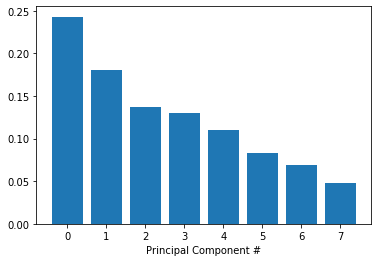

In [48]:
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(n_components_),explained_variance_ratio)
ax.set_xlabel('Principal Component #')

In [49]:
cum_exp_variance = np.cumsum(explained_variance_ratio)

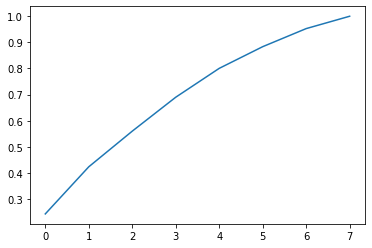

In [50]:
# Plot the cumulative explained variance and draw a dashed line at 0.90.
fig, ax = plt.subplots()
ax.plot(cum_exp_variance)


In [51]:
n_components = 4

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

In [53]:
pca_projection

array([[ 1.59666656,  1.0500117 , -0.01778555,  0.73142514],
       [ 1.58153526,  1.07661327,  1.04346038,  0.16929959],
       [ 0.40930719, -2.24876384,  0.19303803,  0.5125637 ],
       ...,
       [ 0.22134952,  0.1672821 , -1.58761483, -0.3128808 ],
       [ 0.11594489,  0.87936048, -1.80827062,  0.03473905],
       [ 0.01466397, -0.51935963, -0.94874394, -0.80245627]])

# Model Training

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
tree = DecisionTreeClassifier()
tree.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
pred_tree=tree.predict(test_features)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
my_logreg = LogisticRegression()
my_logreg.fit(train_features, train_labels)

C:\Users\Hiesenberg_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
pred_logit = my_logreg.predict(test_features)

In [33]:
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_tree)
class_rep_log = classification_report(test_labels, pred_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.66      0.70      0.68       214
        Rock       0.93      0.92      0.93       987

    accuracy                           0.88      1201
   macro avg       0.79      0.81      0.80      1201
weighted avg       0.88      0.88      0.88      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.75      0.53      0.62       214
        Rock       0.90      0.96      0.93       987

    accuracy                           0.88      1201
   macro avg       0.83      0.74      0.78      1201
weighted avg       0.88      0.88      0.88      1201



In [54]:
echo_tracks.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,341,0.977282,0.468808,0.134975,0.687700,0.105381,0.073124,119.646,0.430707,Rock
3,46204,0.953349,0.498525,0.552503,0.924391,0.684914,0.028885,78.958,0.430448,Rock
4,46205,0.613229,0.500320,0.487992,0.936811,0.637750,0.030327,112.667,0.824749,Rock


# Balancing The Model

In [35]:
hop_only = echo_tracks.loc[echo_tracks["genre_top"]=='Hip-Hop']
rock_only = echo_tracks.loc[echo_tracks["genre_top"]=='Rock']

In [36]:
rock_hop_bal =pd.concat([hop_only,rock_only])

In [37]:
features_bal=rock_hop_bal.iloc[:,:-1]
labels_bal=rock_hop_bal.iloc[:,-1]

In [38]:
train_features, test_features, train_labels, test_labels = train_test_split(features_bal, labels_bal)

In [39]:
tree = DecisionTreeClassifier()
tree.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
pred_tree_bal=tree.predict(test_features)

In [41]:
my_logreg = LogisticRegression()
my_logreg.fit(train_features, train_labels)

C:\Users\Hiesenberg_\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
pred_logit_bal = my_logreg.predict(test_features)

In [43]:
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_tree_bal)
class_rep_log = classification_report(test_labels, pred_logit_bal)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.73      0.71      0.72       229
        Rock       0.93      0.94      0.94       972

    accuracy                           0.90      1201
   macro avg       0.83      0.83      0.83      1201
weighted avg       0.89      0.90      0.89      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.86      0.27      0.41       229
        Rock       0.85      0.99      0.92       972

    accuracy                           0.85      1201
   macro avg       0.86      0.63      0.66      1201
weighted avg       0.85      0.85      0.82      1201

